### 데이터마이닝입문 과제6
앙상블 모형 (bagging, boosting, RF)와 SVM에 대한 분석 절차입니다:
- Bagging
    - No partition
    - Partition
    - CV
- Boosting
    - No partition
    - Partition
    - CV
- Random Forest
    - No partition
    - Partition
    - CV
- SVM
    - No partition
    - Partition
    - CV


### Data Preparation

In [1]:
install.packages("class")
library(class)


The downloaded binary packages are in
	/var/folders/f9/t309_fcx7k5bdf4cxgrn_cdh0000gn/T//RtmpqlmyN4/downloaded_packages


In [3]:
bank = read.csv("bank_data.csv",header=T)
head(bank, 3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


In [4]:
bank$y = ifelse(bank$y == " yes", 1, 0) # yes = 1, no = 0
bank$y = factor(bank$y) # factor 자료형으로 변환

# target 변수 이외에도 deafult, loan, housing 변수 더미변환
bank$default = ifelse(bank$default == " yes", 1, 0) # yes = 1, no = 0
bank$loan = ifelse(bank$loan == " yes", 1, 0) # yes = 1, no = 0
bank$housing = ifelse(bank$housing == " yes", 1, 0) # yes = 1, no = 0

print(sum(is.na(bank))) # 총 11개의 결측치가 존재
bank = na.omit(bank)

[1] 11


In [5]:
print(sum(is.na(bank))) # 결측치가 제거된 모습

[1] 0


## Bagging
: 배깅(Bagging) 알고리즘은 bootstrap + aggregate을 합친 용어입니다. Bootstrap 표본은 표본 추출방법 중 하나로 데이터를 모집단을 대표하는 독립표본으로 가정하에서 그 표본으로부터 무작위복원추출하여 복수의 데이터 집단을 만드는 방법입니다. 이렇게 Bootstrap 표본으로 추출된 복수의 데이터 집단을 이용하여 각각의 모델에 학습시키고 그 모델 결과를 집계(Aggregating) 하는 방법이 Bagging 알고리즘이라고 볼 수 있습니다.
### 1. NO PARTITION

In [6]:
install.packages("rpart")
install.packages("adabag")


The downloaded binary packages are in
	/var/folders/f9/t309_fcx7k5bdf4cxgrn_cdh0000gn/T//RtmpqlmyN4/downloaded_packages


also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘colorspace’, ‘lava’, ‘farver’, ‘labeling’, ‘munsell’, ‘viridisLite’, ‘prodlim’, ‘gtable’, ‘isoband’, ‘scales’, ‘Rcpp’, ‘data.table’, ‘dplyr’, ‘generics’, ‘gower’, ‘ipred’, ‘lubridate’, ‘tidyr’, ‘tidyselect’, ‘timeDate’, ‘ggplot2’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’, ‘iterators’, ‘caret’, ‘foreach’, ‘doParallel’





The downloaded binary packages are in
	/var/folders/f9/t309_fcx7k5bdf4cxgrn_cdh0000gn/T//RtmpqlmyN4/downloaded_packages


##### adabag 패키지의 bagging() 함수로 배깅 모델 학습 시키기
R에서 배깅 알고리즘을 학습시킬 수 있는 함수는 adabag 패키지의 bagging() 함수입니다. bagging() 함수의 입력인자는 다음과 같습니다.
- mfinal = Tree의 반복생성 횟수
- control = 통제 (rpart.control로 설정)

##### rpart 패키지로 control 설정
위의 입력인자에서 control이라는 인자가 있는데 bagging() 함수는 기본적으로 의사결정나무 함수인 rpart() 함수를 이용하기 때문에 rpart.control() 함수를 이용하여 각각 의사결정나무의 옵션을 설정할 수 있습니다.
- minsplit = Tree 최소 Node 수
- maxdepth = 최대깊이
- xval = 교차 인정값
- cp = 복잡성 계수

아래 예시에서는 50개의 tree를 반복생성하며, 통제변수로는 최대 깊이 10, 최소 노드의 수는 5로 설정했습니다.

Loading required package: caret

Warning message:
“package ‘caret’ was built under R version 4.1.1”
Loading required package: ggplot2

Warning message:
“package ‘ggplot2’ was built under R version 4.1.1”
Loading required package: lattice

Loading required package: foreach

Loading required package: doParallel

Loading required package: iterators

Loading required package: parallel



        age     balance    campaign     contact         day     default 
 5.36042684  3.74378324  1.15450934  2.27645375  3.99192751  0.08731505 
   duration   education     housing         job        loan     marital 
38.91711979  0.91860992  1.47714778  5.23743218  0.21588545  0.90155498 
      month       pdays    poutcome    previous 
13.75662503  3.53129861 17.91170540  0.51820513 


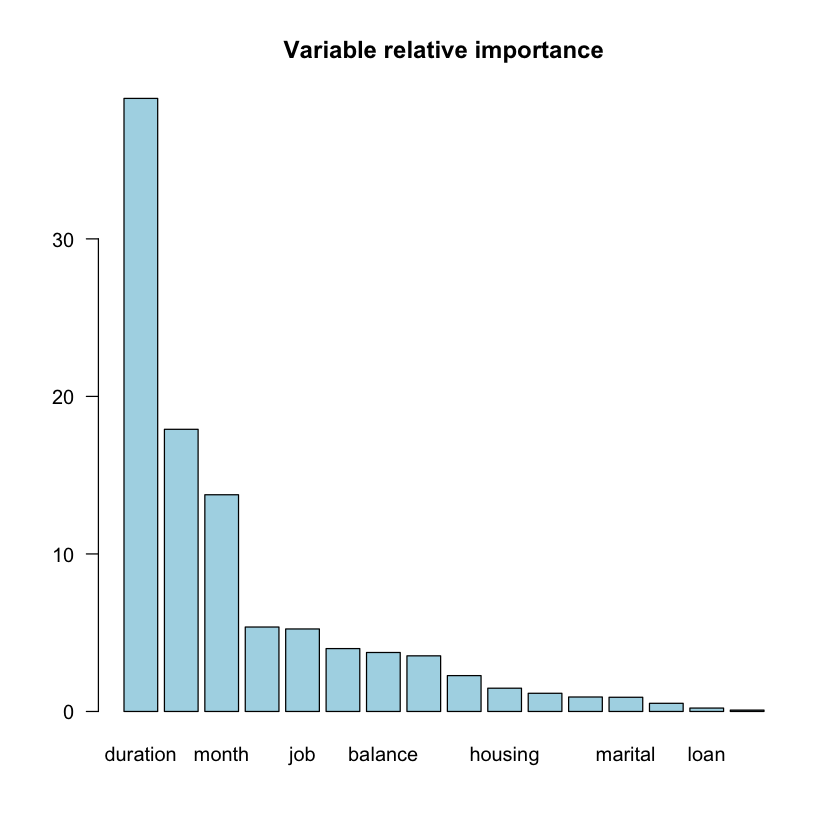

In [7]:
library(rpart)
library(adabag)
set.seed(1234)

# Bagging 진행
my.control = rpart.control(xval=0, cp=0, minsplit=5, maxdepth=10)
fit = bagging(y~., data=bank, mfinal=50, control=my.control)

print(fit$importance)
importanceplot(fit)

> 시각화한 변수의 중요도를 보면, Bank 데이터의 변수 중에서 duration 변수가 분류에 가장 중요한 역할을 하고 있음을 알 수 있습니다. 위의 Decision tree 분석에서도 거의 대부분의 node가 duration으로 split 되고 있는 것으로 보아 duration이 가장 중요한 변수였는데, 결과가 일치함을 볼 수 있습니다.

In [9]:
pred = predict.bagging(fit, newdata=bank)
cutoff = 0.5
yhat = ifelse(pred$prob[,2] > cutoff, 1, 0)
ctable = table(bank$y, yhat, dnn=c("Actual", "Predicted")); ctable # classification table

      Predicted
Actual     0     1
     0 39229   684
     1  2218  3069

> cutoff 임계치를 0.5로 설정했을 때의 Prediction 결과, 실제로 정기예금에 가입하지 않았는데 가입했다고 예측한 오분류보다, 가입했는데 가입하지 않았다고 예측한 오분류가 약 3배 더 많습니다. 이는 앞서 LDA, KNN 등의 모델과 비슷한 오분류 양상이며 NN (7배)보다는 더 낮은 오분류 비율을 보이고 있습니다. NN의 경우 bank data의 변수를 4개로 제약한 반면, Bagging 분석에서는 모든 변수를 사용했기 때문이라고 추정됩니다.

In [10]:
miss.err = 1-sum(diag(ctable))/sum(ctable); miss.err # Misclassification Rate
pred.acc = 1 - miss.err; pred.acc #Prediction Accuracy
diag(ctable)[2]/apply(ctable, 1, sum)[2] # Sensitivity
diag(ctable)[1]/apply(ctable, 1, sum)[1] # Specificity

[1] 0.06420354

[1] 0.9357965

1 
0.5804804

0 
0.9828627

> 앞선 confusion matrix 결과와 같이 민감도는 0.6의 낮은 수치를 보이고 있으며 앞선 KNN, LDA, QDA 등의 선형모델과 유사합니다. Missclassification error와 prediction accuracy는 앞선 선형 모델들과 매우 유사한 수준입니다.  

In [12]:
install.packages("ROCR")
library(ROCR)


The downloaded binary packages are in
	/var/folders/f9/t309_fcx7k5bdf4cxgrn_cdh0000gn/T//RtmpqlmyN4/downloaded_packages


[[1]]
[1] 0.9167301

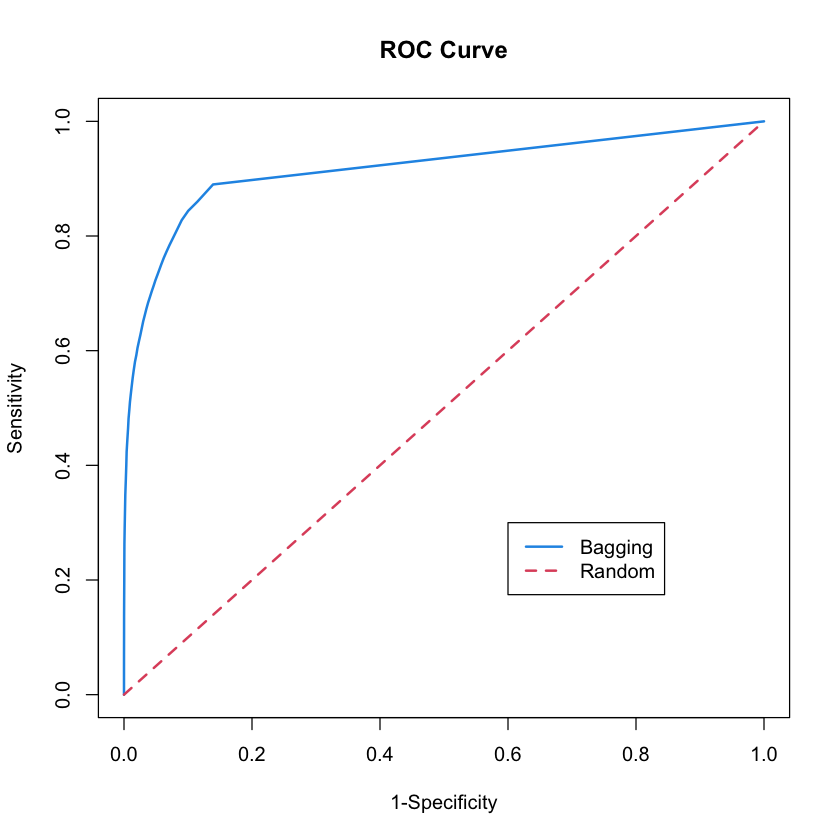

In [13]:
pred2 = predict.bagging(fit, newdata=bank)$prob
pred = prediction(pred2[,2], bank$y)
perf = performance(pred, "tpr","fpr")

par(mfrow=c(1,1))
plot(perf, col = 4, lwd = 2, xlab = "1-Specificity", ylab = "Sensitivity", main = "ROC Curve") #ROC
lines(x = c(0,1), y = c(0,1), col = 2, lty = 2, lwd = 2)
legend(0.6, 0.3, legend = c("Bagging","Random"), col = c(4,2), lty = c(1,2), lwd = 2)

performance(pred, "auc")@y.values #AUC

> AUC 값은 앞선 LDA, QDA (약 0.8 정도)와 NN(0.82) 더 높은 값인 0.92입니다. ROC Curve를 시각화해본 결과, random prediction보다 훨씬 더 우수한 모델임을 알 수 있습니다.

### 2. PARTITION

In [15]:
# train/test split 
set.seed(123)
V = 2
n =  NROW(bank)
id = sample(1:V, n, prob = c(0.7,0.3), replace = T) # Partitioning 7:3
ii = which(id==1)
bank2.train = bank[ii,]
bank2.test  = bank[-ii,]

       age    balance   campaign    contact        day    default   duration 
 5.4840953  4.0733344  1.2511658  2.2130349  4.3484515  0.1199629 37.4017347 
 education    housing        job       loan    marital      month      pdays 
 1.2484325  1.6623411  5.8065285  0.2478630  0.8856054 13.3941621  3.5043255 
  poutcome   previous 
17.6839339  0.6750284 


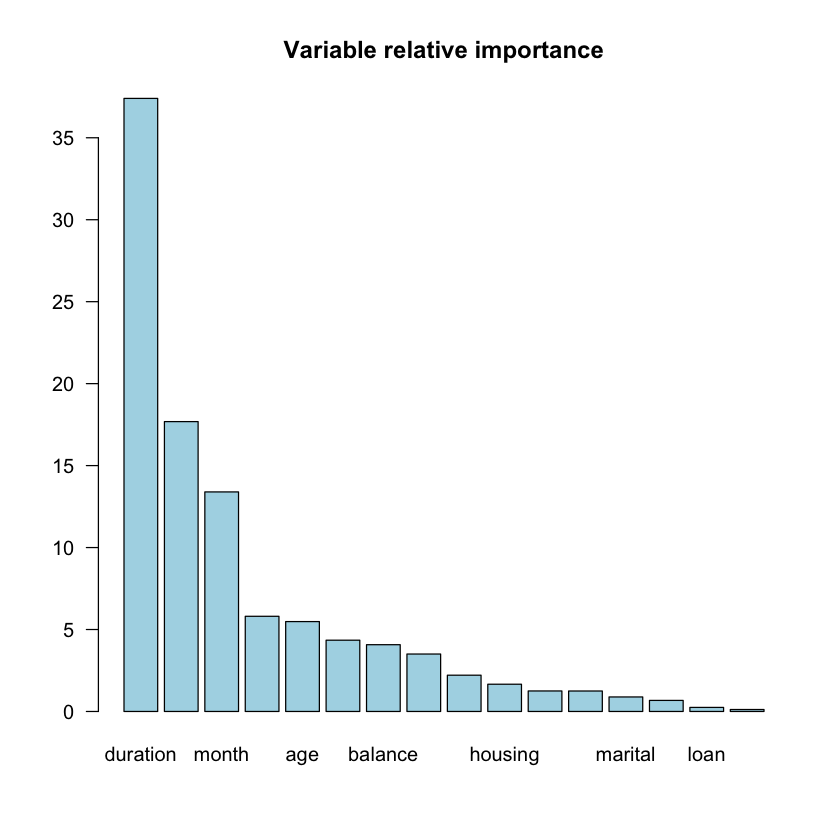

In [16]:
set.seed(1234)
my.control = rpart.control(xval=0, cp=0, minsplit=5, maxdepth=10)
fit = bagging(y~., data=bank2.train, mfinal=50, control=my.control)

print(fit$importance)
importanceplot(fit)

> 훈련 데이터셋 7: 시험 데이터셋 3으로 나누었을 때의 변수 중요도 플롯을 시각화해본 결과, Bank 데이터의 변수 중에서 duration 변수가 분류에 가장 중요한 역할을 하고 있음을 알 수 있습니다. 이는 위 No Parition 때의 결과와 일치합니다. No Partition 때에는 duration 변수가 38.92이었으며 Partition시 duration 변수가 37.40입니다. 약간 낮아진 이유는 더 적은 데이터셋을 갖고 변수 중요도를 알아보기 때문이라고 추정됩니다.

In [17]:
pred = predict.bagging(fit, newdata=bank2.test)
cutoff = 0.5
yhat = ifelse(pred$prob[,2] > cutoff, 1, 0)
ctable = table(bank2.test$y, yhat, dnn=c("Actual", "Predicted")); ctable #classification table

miss.err = 1-sum(diag(ctable))/sum(ctable); miss.err # Misclassification Rate
pred.acc = 1 - miss.err; pred.acc #Prediction Accuracy
diag(ctable)[2]/apply(ctable, 1, sum)[2] # Sensitivity
diag(ctable)[1]/apply(ctable, 1, sum)[1] # Specificity

      Predicted
Actual     0     1
     0 11399   406
     1   830   716

[1] 0.09257734

[1] 0.9074227

1 
0.4631307

0 
0.9656078

> Prediction 결과, 실제로 정기예금에 가입하지 않았는데 가입했다고 예측한 오분류보다, 가입했는데 가입하지 않았다고 예측한 오분류가 약 2배 더 많습니다. 훈련과 시험 데이터셋으로 나누지 않았을 때는 해당 오분류가 3배 더 많았던 반면, 데이터셋을 7:3으로 분할하니 2배 더 많게 나타납니다. 역시 앞선 No partition 결과와 같이 민감도 또한 낮은 수치를 보이고 있습니다. 다만 민감도 측면에서 앞선 No partition 분석보다 좋은 결과를 보였습니다. No Partition일 때는 0.58, Partition에서는 0.46의 값을 보입니다. 이는 실제로 정기예금에 가입하지 않았는데 가입했다고 예측한 오분류보다, 가입했는데 가입하지 않았다고 예측한 오분류가 완화되었음을 나타내는 지표이기 때문입니다. 
특이도는 No Partition의 경우 0.98, Partition의 경우 0.96으로 미미한 감소가 있습니다.

[[1]]
[1] 0.9303179

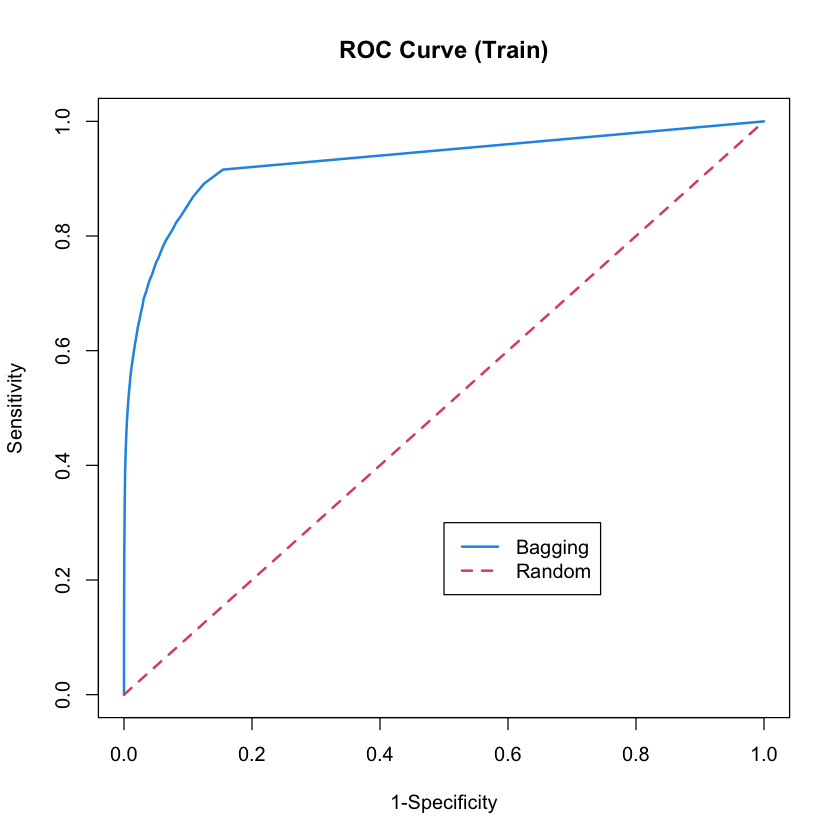

[[1]]
[1] 0.8908109

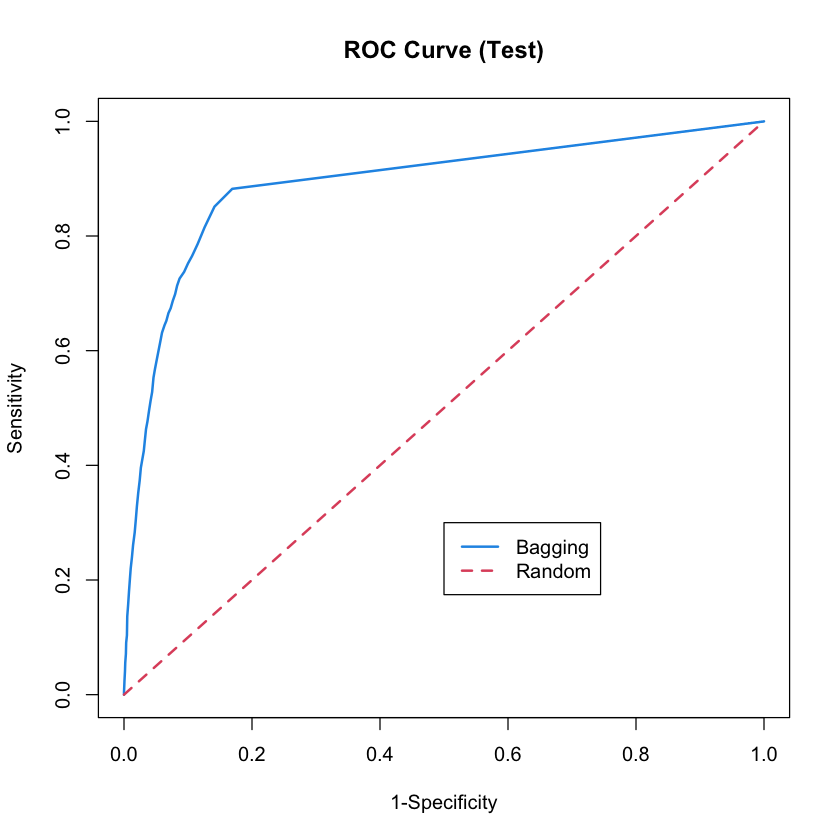

In [21]:
library(ROCR)
par(mfrow = c(1,1))

pred2 = predict.bagging(fit, newdata=bank2.train)$prob
pred = prediction(pred2[,2], bank2.train$y)
perf = performance(pred, "tpr","fpr")

plot(perf, col = 4, lwd = 2, xlab = "1-Specificity", ylab = "Sensitivity", main = "ROC Curve (Train)") #ROC
lines(x = c(0,1), y = c(0,1), col = 2, lty = 2, lwd = 2)
legend(0.5, 0.3, legend = c("Bagging","Random"), col = c(4,2), lty = c(1,2), lwd = 2)

performance(pred, "auc")@y.values #AUC


pred2 = predict.bagging(fit, newdata=bank2.test)$prob
pred = prediction(pred2[,2], bank2.test$y)
perf = performance(pred, "tpr","fpr")

plot(perf, col = 4, lwd = 2, xlab = "1-Specificity", ylab = "Sensitivity", main = "ROC Curve (Test)") #ROC
lines(x = c(0,1), y = c(0,1), col = 2, lty = 2, lwd = 2)
legend(0.5, 0.3, legend = c("Bagging","Random"), col = c(4,2), lty = c(1,2), lwd = 2)

performance(pred, "auc")@y.values #AUC

> Train AUC값은 0.93, Test AUC값은 0.89입니다. Train과 test data의 ROC curve fitting 결과 두 모델 모두 random prediction 보다 좋은 성능을 보임을 알 수 있습니다. 하지만 Train AUC가 Test AUC값보다 더 높은 값을 보이는 것으로 보아 overfitting(과적합)을 의심해볼 수 있을 것 같습니다.

### 3. CV ERROR

In [22]:
V = 10 #V-fold CV
miss.err.test = 0
cutoff = 0.5

set.seed(12345)
id = sample(1:V, nrow(bank), replace = T)

for(i in 1:V) {
  
  print(i)
  
  ## Data Partitioning

  bank2.train = bank[id != i,] 
  bank2.test = bank[id == i,] 
  
  ## Boosting

  my.control = rpart.control(xval=0, cp=0, minsplit=5, maxdepth=10)
  fit = bagging(y~., data=bank2.train, mfinal=50, control=my.control)

  ## Predicting and Evaluating
  
  pred = predict.bagging(fit, newdata=bank2.test)
  yhat = ifelse(pred$prob[,2] > cutoff, 1, 0)
  miss.err.test = miss.err.test + mean(bank2.test$y != yhat) 
  
}

cv.err.test = miss.err.test/ V;cv.err.test # CV test error

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10


[1] 0.09275521

> 10-fold CV error을 계산해본 결과, 앞선 Bagging의 2가지 분석인 No Partition과 Partition보다 더

---

## Boosting
: Boosting은 약한 학습기(weak learner)을 여러 개를 사용해서 순차적으로 분석을 진행하고, 제대로 예측하지 못한 오차에 중점을 두면서 반복적으로 학습해 예측 성능을 높여나가는 기법입니다. 즉, 이는 잔차들에 대해 예측선(support vector)들을 tuning해나가는 기법이라고 볼 수 있습니다. 즉, 앞선 bagging이 중심극한정리와 동일한 원리를 가진 기법이라고 한다면 boosting은 잔차 분석과 동일한 원리를 가진 기법이라고 볼 수 있습니다.

### 1. NO PARTITION

In [23]:
set.seed(1234)
my.control = rpart.control(xval=0, cp=0, maxdepth=4)
fit = boosting(y~., data=bank, boos=T, mfinal=50, control=my.control)

fit$trees

[[1]]
n= 45200 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 45200 5292 0 (0.88292035 0.11707965)  
   2) duration< 550.5 40799 3272 0 (0.91980196 0.08019804)  
     4) poutcome= failure, other, unknown 39442 2407 0 (0.93897368 0.06102632)  
       8) month= apr, aug, feb, jan, jul, jun, may, nov 38016 1846 0 (0.95144150 0.04855850) *
       9) month= dec, mar, oct, sep 1426  561 0 (0.60659187 0.39340813)  
        18) duration< 174.5 686  134 0 (0.80466472 0.19533528) *
        19) duration>=174.5 740  313 1 (0.42297297 0.57702703) *
     5) poutcome= success 1357  492 1 (0.36256448 0.63743552)  
      10) duration< 161.5 353  121 0 (0.65722380 0.34277620)  
        20) month= apr, aug, dec, jan, jul, jun, may, nov, oct 262   68 0 (0.74045802 0.25954198) *
        21) month= feb, mar, sep 91   38 1 (0.41758242 0.58241758) *
      11) duration>=161.5 1004  260 1 (0.25896414 0.74103586) *
   3) duration>=550.5 4401 2020 0 (0.54101341 0.45898659)  
     6

> 총 50번의 반복학습을 진행해본 결과, 거의 대부분의 node가 duration으로 split 되고 있는 것으로 보아 duration이 중요한 변수임을 알 수 있습니다. 이는 앞선 Decision tree에서의 결과와 일치합니다. 

In [29]:
pred = predict.boosting(fit, newdata=bank)
cutoff = 0.5
yhat = ifelse(pred$prob[,2] > cutoff, 1, 0)
ctable = table(bank$y, yhat, dnn=c("Actual", "Predicted")); ctable #classification table

miss.err = 1-sum(diag(ctable))/sum(ctable); miss.err # Misclassification Rate
pred.acc = 1 - miss.err; pred.acc #Prediction Accuracy
diag(ctable)[2]/apply(ctable, 1, sum)[2] # Sensitivity
diag(ctable)[1]/apply(ctable, 1, sum)[1] # Specificity

      Predicted
Actual     0     1
     0 38493  1420
     1  2688  2599

[1] 0.09088496

[1] 0.909115

1 
0.4915831

0 
0.9644226

> 위의 boosting에 대한 오분류표를 보면 임계치가 0.5일 때 실제로 정기예금에 가입하지 않았는데 가입했다고 예측한 오분류보다, 가입했는데 가입하지 않았다고 예측한 오분류가 약 2배 더 많습니다. 이는 bagging에서의 parition과 비슷한 양상을 보이고 있습니다.
또한 특이도는 0.96으로 bagging의 no partition보다는 작고 partition과는 비슷한 값을 보입니다. 같은 no partition 선상에서 두고 봤을 때 저희 bank 데이터에는 boosting보다는 bagging이 더 만족스러운 결과를 내고 있습니다.

[[1]]
[1] 0.9329387

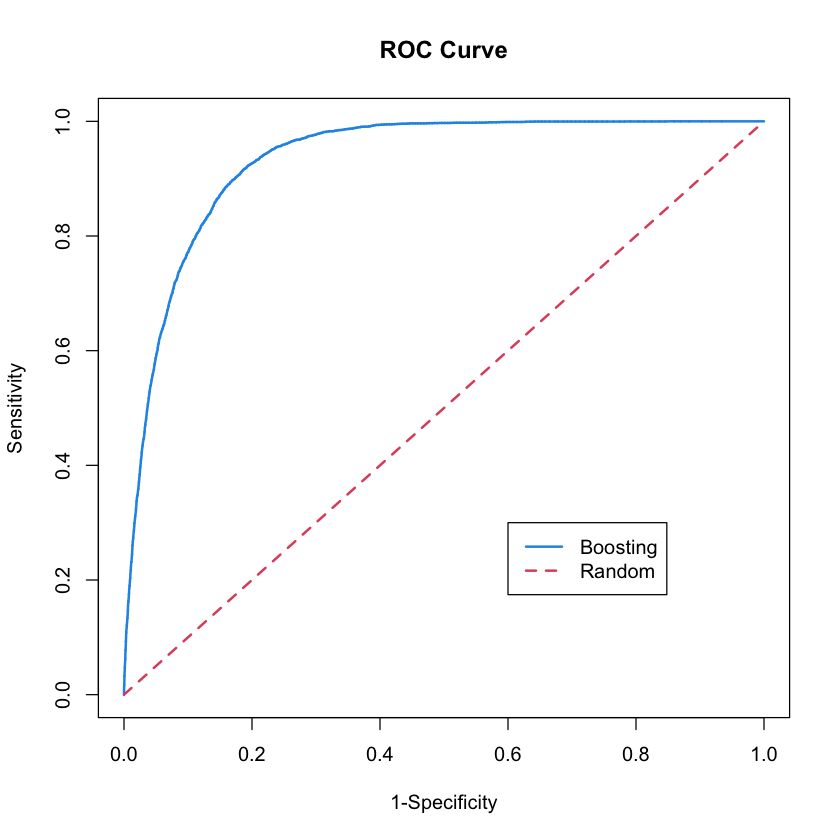

In [30]:
pred2 = predict.boosting(fit, newdata=bank)$prob
pred = prediction(pred2[,2], bank$y)
perf = performance(pred, "tpr","fpr")

par(mfrow=c(1,1))
plot(perf, col = 4, lwd = 2, xlab = "1-Specificity", ylab = "Sensitivity", main = "ROC Curve") #ROC
lines(x = c(0,1), y = c(0,1), col = 2, lty = 2, lwd = 2)
legend(0.6, 0.3, legend = c("Boosting","Random"), col = c(4,2), lty = c(1,2), lwd = 2)

performance(pred, "auc")@y.values #AUC

> 하지만 AUC값과 ROC curve를 시각화해보면 AUC값은 bagging의 no partition 때의 값인 0.91보다 더 높은 0.93을 보이고 있습니다. 이는 이전 LDA, QDA, NN 등의 분석기법에서 가장 우수한 성능입니다.

### 2. PARTITION

In [31]:
# train/test split 
set.seed(123)
V = 2
n =  NROW(bank)
id = sample(1:V, n, prob = c(0.7,0.3), replace = T) # Partitioning 7:3
ii = which(id==1)
bank2.train = bank[ii,]
bank2.test  = bank[-ii,]

In [33]:
set.seed(1234)
my.control = rpart.control(xval=0, cp=0, maxdepth=4)
fit = boosting(y~., data=bank2.train, boos=T, mfinal=50, control=my.control)

fit$trees

[[1]]
n= 31849 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 31849 3700 0 (0.88382681 0.11617319)  
   2) duration< 529.5 28496 2267 0 (0.92044497 0.07955503)  
     4) poutcome= failure, other, unknown 27557 1683 0 (0.93892659 0.06107341)  
       8) month= apr, aug, feb, jan, jul, jun, may, nov 26480 1261 0 (0.95237915 0.04762085) *
       9) month= dec, mar, oct, sep 1077  422 0 (0.60817084 0.39182916)  
        18) duration< 172.5 523  111 0 (0.78776291 0.21223709) *
        19) duration>=172.5 554  243 1 (0.43862816 0.56137184) *
     5) poutcome= success 939  355 1 (0.37806177 0.62193823)  
      10) duration< 132.5 178   36 0 (0.79775281 0.20224719) *
      11) duration>=132.5 761  213 1 (0.27989488 0.72010512)  
        22) month= may, nov 188   89 0 (0.52659574 0.47340426) *
        23) month= apr, aug, dec, feb, jan, jul, jun, mar, oct, sep 573  114 1 (0.19895288 0.80104712) *
   3) duration>=529.5 3353 1433 0 (0.57262153 0.42737847)  
     6)

> 분할한 데이터에 대해서 50번의 반복추출로 boosting을 해본 결과, 앞선 bagging 때와 유사하게 duration 변수가 가장 중요한 변수로 나타났습니다.

In [34]:
pred = predict.boosting(fit, newdata=bank2.test)
cutoff = 0.5
yhat = ifelse(pred$prob[,2] > cutoff, 1, 0)
ctable = table(bank2.test$y, yhat, dnn=c("Actual", "Predicted")); ctable #classification table

miss.err = 1-sum(diag(ctable))/sum(ctable); miss.err # Misclassification Rate
pred.acc = 1 - miss.err; pred.acc #Prediction Accuracy
diag(ctable)[2]/apply(ctable, 1, sum)[2] # Sensitivity
diag(ctable)[1]/apply(ctable, 1, sum)[1] # Specificity

      Predicted
Actual     0     1
     0 11374   431
     1   877   669

[1] 0.09797019

[1] 0.9020298

1 
0.4327296

0 
0.96349

> No partition과 유사하게 실제로 정기예금에 가입하지 않았는데 가입했다고 예측한 오분류보다, 가입했는데 가입하지 않았다고 예측한 오분류가 약 2배 더 많습니다. 또한, 특이도 값은 no partition과 거의 유사한 0.96의 매우 높은 수치를 보입니다.

[[1]]
[1] 0.9365213

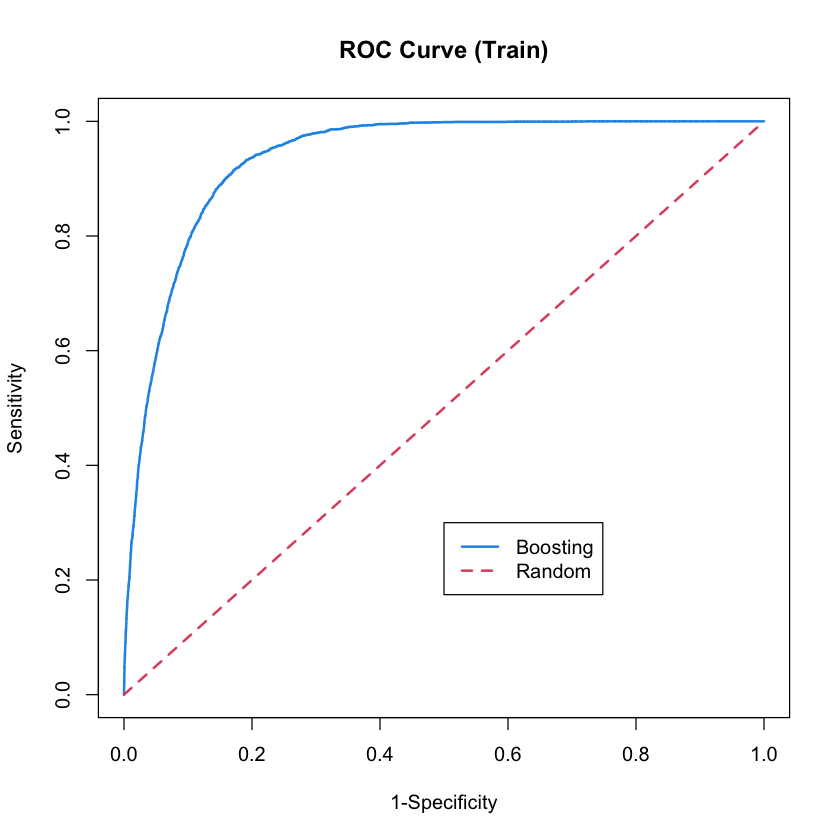

[[1]]
[1] 0.9249139

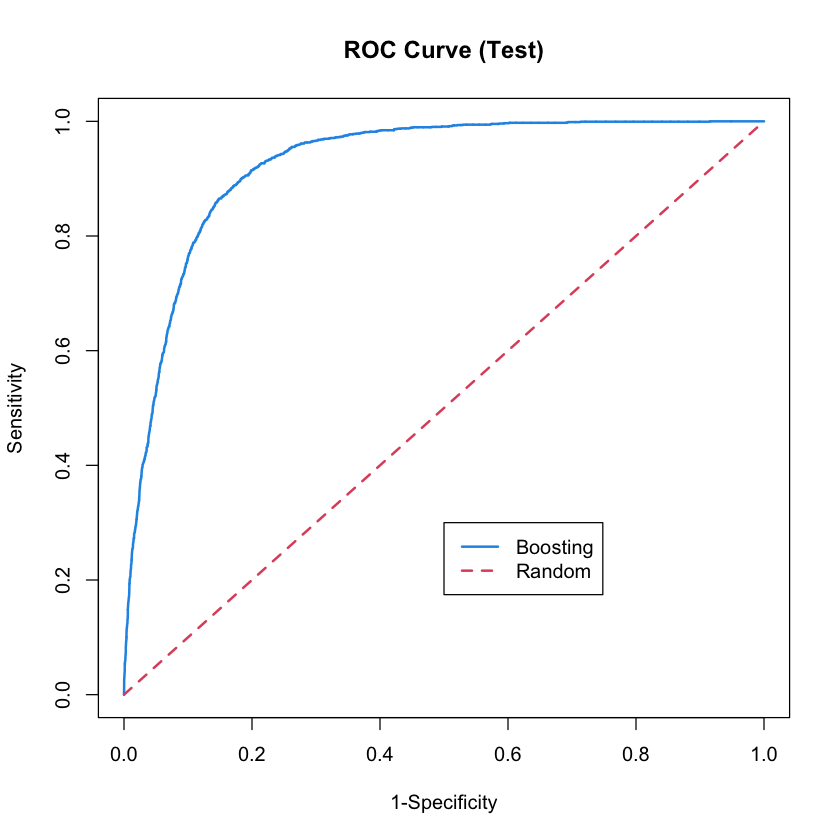

In [35]:
par(mfrow = c(1,1))

pred2 = predict.boosting(fit, newdata=bank2.train)$prob
pred = prediction(pred2[,2], bank2.train$y)
perf = performance(pred, "tpr","fpr")

plot(perf, col = 4, lwd = 2, xlab = "1-Specificity", ylab = "Sensitivity", main = "ROC Curve (Train)") #ROC
lines(x = c(0,1), y = c(0,1), col = 2, lty = 2, lwd = 2)
legend(0.5, 0.3, legend = c("Boosting","Random"), col = c(4,2), lty = c(1,2), lwd = 2)

performance(pred, "auc")@y.values #AUC


pred2 = predict.boosting(fit, newdata=bank2.test)$prob
pred = prediction(pred2[,2], bank2.test$y)
perf = performance(pred, "tpr","fpr")

plot(perf, col = 4, lwd = 2, xlab = "1-Specificity", ylab = "Sensitivity", main = "ROC Curve (Test)") #ROC
lines(x = c(0,1), y = c(0,1), col = 2, lty = 2, lwd = 2)
legend(0.5, 0.3, legend = c("Boosting","Random"), col = c(4,2), lty = c(1,2), lwd = 2)

performance(pred, "auc")@y.values #AUC

> Train AUC와 test AUC는 각각 0.937, 0.925로 매우 유사한 값을 보여 overfitting의 문제는 발생하지 않고 있다고 추정됩니다. 또한, 기존의 진행했던 모든 분석 기법에 비해 가장 우수한 성능을 보이고 있습니다.

### 3. CV ERROR

In [37]:
V = 10 #V-fold CV
miss.err.test = 0
cutoff = 0.5

set.seed(12345)
id = sample(1:V, nrow(bank), replace = T)

for(i in 1:V) {
  
  print(i)
  
  ## Data Partitioning

  bank2.train = bank[id != i,] 
  bank2.test = bank[id == i,] 
  
  ## Boosting

  my.control = rpart.control(xval=0, cp=0, maxdepth=4)
  fit = boosting(y~., data=bank2.train, boos=T, mfinal=50, control=my.control)

  ## Predicting and Evaluating
  
  pred = predict.boosting(fit, newdata=bank2.test)
  yhat = ifelse(pred$prob[,2] > cutoff, 1, 0)
  miss.err.test = miss.err.test + mean(bank2.test$y != yhat) 
  
}

cv.err.test = miss.err.test/ V;cv.err.test # CV test error

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10


[1] 0.09581463

> 10-fold CV error를 측정해본 결과, 정확도가 0.90으로 앞선 bagging에서의 방법과 비슷한 정확도를 보입니다.

---

## Random Forest
: 일반적으로 RF는 bagging보다 좋은 성능을 보여줍니다. 이는 RF에서 생성하는 나무는 bagging과 다르게 상관성을 제거하는 특성을 갖기 때문입니다. 예를 들어 RF에서는 의사결정트리를 만들 때, 트리 내에서 분할이 고려될 때마다 p개의 설명변수들의 전체 집합에서 m개로 구성된 랜덤표본이 분할 후보로 선택됩니다. 분할은 이들 m개의 설명변수 중 하나만을 사용해 분할됩니다. 각 분할에서는 m개의 설명변수들의 새로운 표본이 선택되며, 이는 보통 p(독립변수 개수)의 제곱근만큼 선택됩니다. 반대로 배깅의 경우, 만약 자료에서 하나의 매우 강력하고 중요한 독립변수가 존재한다면 (저희 데이터에서는 duration 변수), 배깅된 트리들의 시작 분할 노드는 해당 변수만 고려하는 특성이 있습니다. 그 결과, 배깅된 트리들은 서로 유사하게 보이며 여기서 얻는 예측치들은 서로 높게 상관됩니다. 결국, RF는 매번 분할을 수행할 때마다 일부 변수만 고려함으로 이런 부분을 극복할 수 있습니다.

### 1. NO PARTITION

In [38]:
install.packages("randomForest")
library(randomForest)


The downloaded binary packages are in
	/var/folders/f9/t309_fcx7k5bdf4cxgrn_cdh0000gn/T//RtmpqlmyN4/downloaded_packages


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




##### randomForest 패키지의 randomForest() 함수로 Random Forest 트리 생성
R에서 Random Forest를 생성할 수 있는 함수는 randomForest 패키지의 randomForest() 함수입니다. randomForest() 함수의 입력인자는 다음과 같습니다.
- ntree: 생성할 나무의 개수
- mtry: 각 노드에서 랜덤하게 고려될 변수의 개수 (보통은 독립변수의 제곱근만큼 지정)
- nodesize: 나무의 깊이, 최소한의 노드 수

,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
age,21.8504248,9.990892,26.5064343,943.54942
job,5.7692346,1.235840,6.3118193,437.11707
marital,2.2767646,8.299130,7.5725416,188.66031
education,4.4258493,3.402563,5.6795272,246.55881
default,-0.5571614,1.479282,0.4447277,16.64601
balance,5.2002257,5.293148,7.9759446,1007.96063
housing,25.8211674,16.077431,31.6835469,264.64467
loan,2.5770073,7.946241,8.4716687,87.82383
contact,27.3756289,8.655763,28.6077962,179.28519
day,31.5940463,5.060866,31.4422554,824.34470


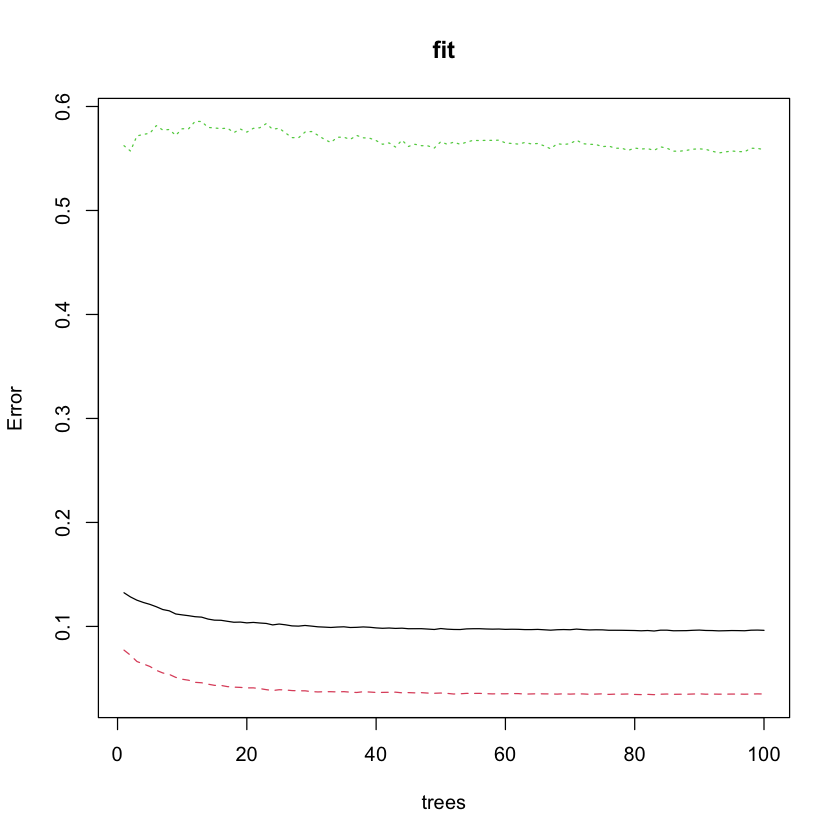

In [39]:
set.seed(1234)
fit = randomForest(y~., data=bank, ntree=100, mtry=5, importance=T)

plot(fit, type="l")
importance(fit)

> 나무를 100개 생성, 각 노드에서는 랜덤으로 5개의 변수를 고려하며 이를 고려하는 기준은 변수의 중요도입니다.
정확도 개선에 중요한 변수는 MeanDecreaseAccuracy 값으로 판단해서 duration > month > poutcome 순서를 나타냅니다. 이는 앞선 모든 분석 기법과 동일한 양상입니다. 노드 불순도 개선에 중요한 변수는 MeanDecreasesGini의 값으로 판단할 수 있으며 duration > balance > age로 MeanDecreaseAccuracy와는 조금 다른 양상을 보입니다.

In [40]:
pred = predict(fit, newdata=bank, type="prob")
cutoff = 0.5
yhat = ifelse(pred[,2] > cutoff, 1, 0)
ctable = table(bank$y, yhat, dnn=c("Actual", "Predicted")); ctable #classification table

miss.err = 1-sum(diag(ctable))/sum(ctable); miss.err # Misclassification Rate
pred.acc = 1 - miss.err; pred.acc #Prediction Accuracy
diag(ctable)[2]/apply(ctable, 1, sum)[2] # Sensitivity
diag(ctable)[1]/apply(ctable, 1, sum)[1] # Specificity

      Predicted
Actual     0     1
     0 39913     0
     1     4  5283

[1] 8.849558e-05

[1] 0.9999115

1 
0.9992434

0 
1

> 오분류표를 보면 RF를 이용하면 거의 대부분 정분류하는 모습을 볼 수 있습니다. 민감도는 거의 0.999로 매우 높은 수치, 그리고 특이도는 1의 값을 보입니다. 이는 RF이 앞선 앙상블 기법인 bagging/boosting보다는 확연히 좋은 성능을 보이는 것을 알 수 있습니다.

[[1]]
[1] 1

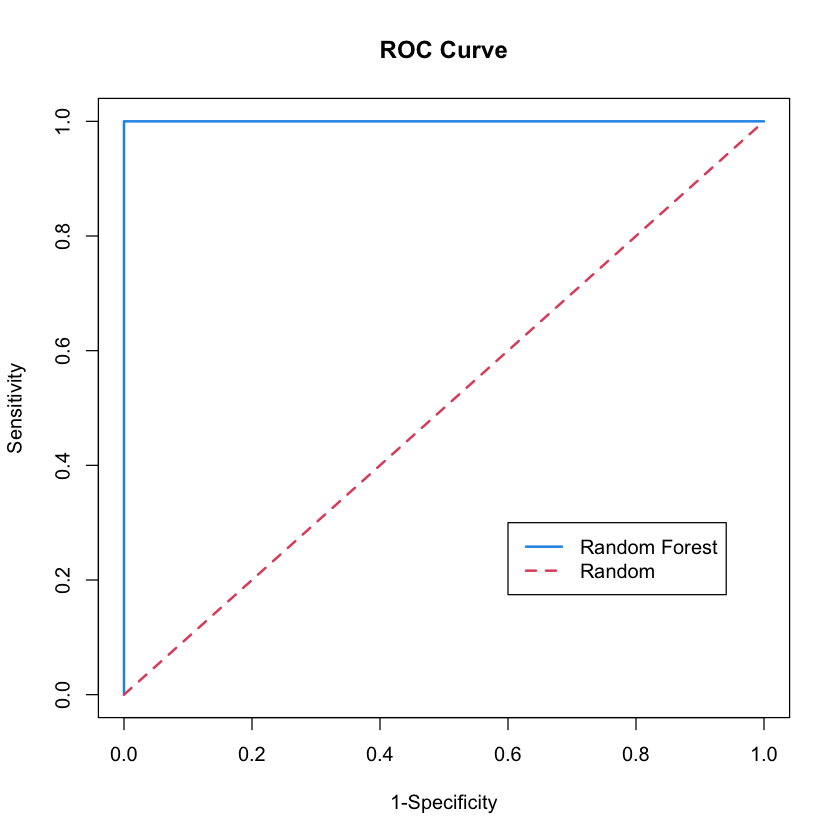

In [41]:
pred2 = predict(fit, newdata=bank, type="prob")
pred = prediction(pred2[,2], bank$y)
perf = performance(pred, "tpr","fpr")

par(mfrow=c(1,1))
plot(perf, col = 4, lwd = 2, xlab = "1-Specificity", ylab = "Sensitivity", main = "ROC Curve") #ROC
lines(x = c(0,1), y = c(0,1), col = 2, lty = 2, lwd = 2)
legend(0.6, 0.3, legend = c("Random Forest","Random"), col = c(4,2), lty = c(1,2), lwd = 2)

performance(pred, "auc")@y.values #AUC

> Random forest (no partition 버전)의 AUC값은 1로 매우 높은 수치입니다.

### 2. PARTITION

In [42]:
set.seed(123)
V = 2
n =  NROW(bank)
id = sample(1:V, n, prob = c(0.7,0.3), replace = T) # Partitioning 7:3
ii = which(id==1)
bank.train = bank[ii,]
bank.test  = bank[-ii,]

,0,1,MeanDecreaseAccuracy,MeanDecreaseGini
age,21.05985634,7.3321390,25.2036151,664.89052
job,5.12296977,0.8508035,5.3245421,310.37988
marital,2.73909358,5.4595331,5.7170911,141.61058
education,2.41145201,2.7349212,3.3193628,173.72095
default,0.04065971,-0.8406101,-0.3645145,11.98906
balance,3.96645560,1.9735484,4.4455825,706.66732
housing,23.51795351,12.2679374,27.3435984,179.30771
loan,4.59787045,8.2424263,8.0500272,63.53932
contact,25.39085974,8.6867249,26.5967446,126.37156
day,31.25202960,4.0354289,32.1884419,576.09113


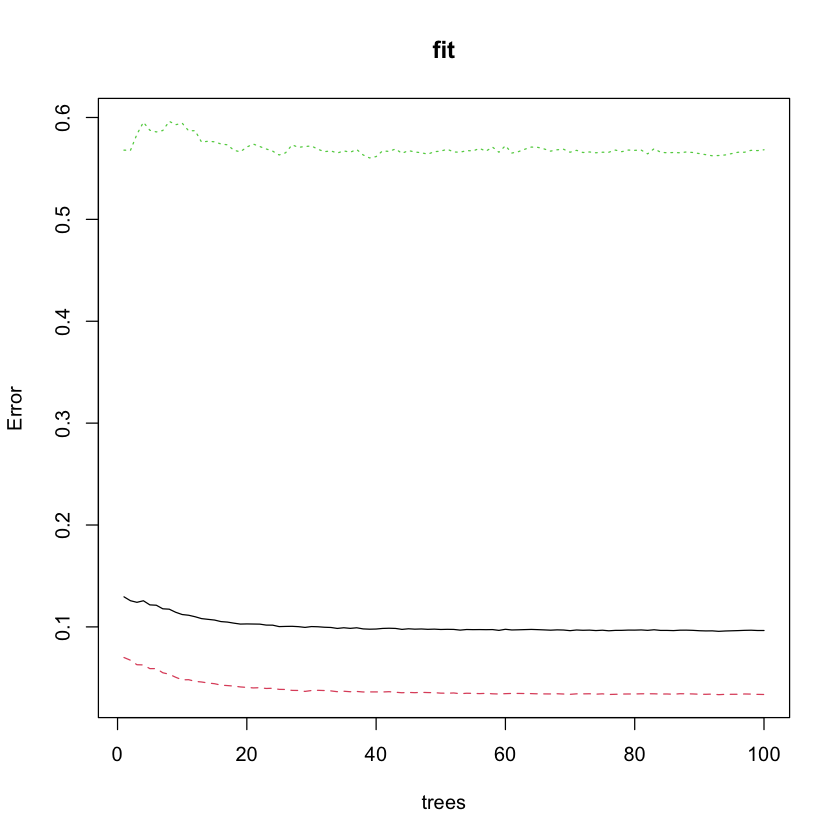

In [43]:
set.seed(1234)
fit = randomForest(y~., data=bank.train, ntree=100, mtry=5, importance=T)

plot(fit, type="l")
importance(fit)

> 데이터셋을 훈련 데이터셋 : 시험 데이터셋를 7:3으로 분할한 결과, MeanDecreaseAccuracy는 duration > month > day입니다. 정확도 개선에 가장 중요한 변수인 duration과 2순위인 month는 동일한 반면, no partition에서는 poutcome이 partition에서는 day로 나타납니다.
MeanDecreaseGini는 duration > balance > age로 no partition과 일치합니다.

In [44]:
pred = predict(fit, newdata=bank.test, type="prob")
cutoff = 0.5
yhat = ifelse(pred[,2] > cutoff, 1, 0)
ctable = table(bank.test$y, yhat, dnn=c("Actual", "Predicted")); ctable #classification table

miss.err = 1-sum(diag(ctable))/sum(ctable); miss.err # Misclassification Rate
pred.acc = 1 - miss.err; pred.acc #Prediction Accuracy
diag(ctable)[2]/apply(ctable, 1, sum)[2] # Sensitivity
diag(ctable)[1]/apply(ctable, 1, sum)[1] # Specificity

      Predicted
Actual     0     1
     0 11431   374
     1   915   631

[1] 0.09654708

[1] 0.9034529

1 
0.4081501

0 
0.9683185

> 실제로 정기예금에 가입하지 않았는데 가입했다고 예측한 오분류보다, 가입했는데 가입하지 않았다고 예측한 오분류가 약 2.5배 더 많습니다. 이 때문에 민감도는 0.408이라는 꽤 낮은 수치를 보이지만 특이도는 0.968의 높은 수치를 달성합니다.

[[1]]
[1] 1

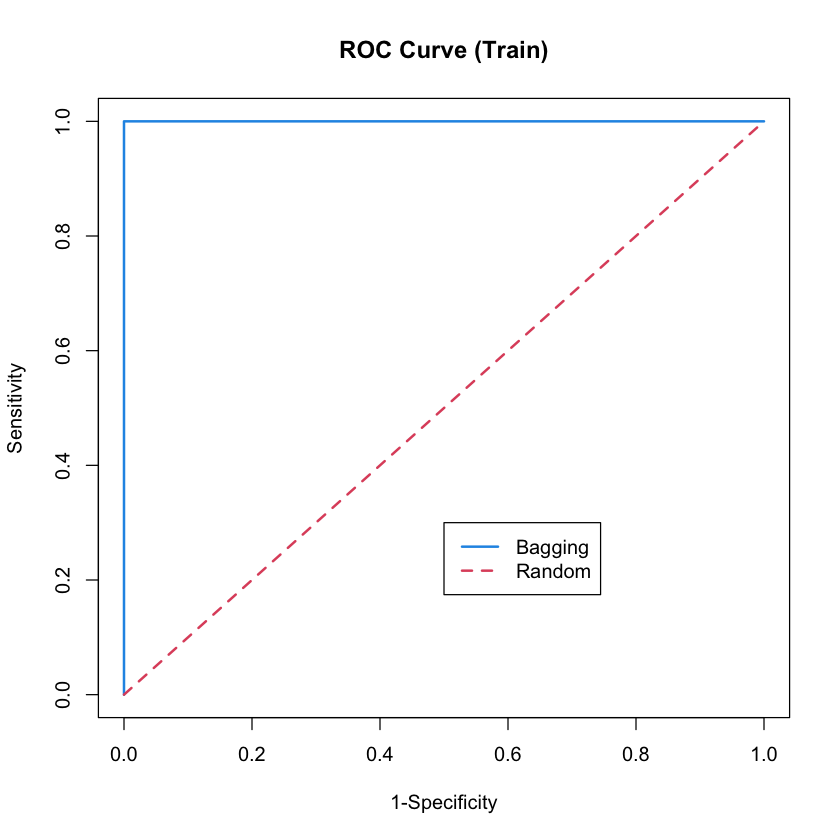

[[1]]
[1] 0.9273132

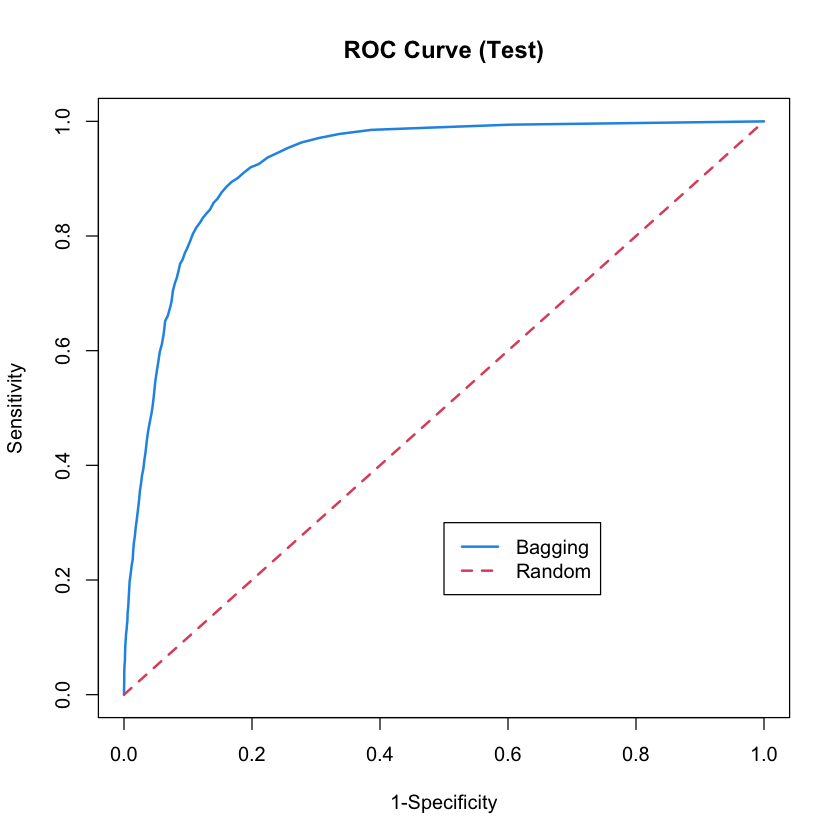

In [45]:
par(mfrow = c(1,1))

pred2 = predict(fit, newdata=bank.train, type="prob")
pred = prediction(pred2[,2], bank.train$y)
perf = performance(pred, "tpr","fpr")

plot(perf, col = 4, lwd = 2, xlab = "1-Specificity", ylab = "Sensitivity", main = "ROC Curve (Train)") #ROC
lines(x = c(0,1), y = c(0,1), col = 2, lty = 2, lwd = 2)
legend(0.5, 0.3, legend = c("Bagging","Random"), col = c(4,2), lty = c(1,2), lwd = 2)

performance(pred, "auc")@y.values #AUC


pred2 = predict(fit, newdata=bank.test, type="prob")
pred = prediction(pred2[,2], bank.test$y)
perf = performance(pred, "tpr","fpr")

plot(perf, col = 4, lwd = 2, xlab = "1-Specificity", ylab = "Sensitivity", main = "ROC Curve (Test)") #ROC
lines(x = c(0,1), y = c(0,1), col = 2, lty = 2, lwd = 2)
legend(0.5, 0.3, legend = c("Bagging","Random"), col = c(4,2), lty = c(1,2), lwd = 2)

performance(pred, "auc")@y.values #AUC

> Train과 test AUC 값은 각각 1과 0.927로 성능 차이가 약간 나는 것으로 보아 overfitting을 의심해볼 수 있을 것 같습니다.

### 3. CV ERROR

In [46]:
V = 10 #V-fold CV
miss.err.test = 0
cutoff = 0.5

set.seed(12345)
id = sample(1:V, nrow(bank), replace = T)

for(i in 1:V) {
  
  print(i)
  
  ## Data Partitioning

  bank.train = bank[id != i,] 
  bank.test  = bank[id == i,] 
  
  ## Forecasting

  fit = randomForest(y~., data=bank.train, ntree=100, mtry=5, importance=T)

  ## Predicting and Evaluating

  pred = predict(fit, newdata=bank.test, type="prob")
  yhat = ifelse(pred[,2] > cutoff, 1, 0)
  miss.err.test = miss.err.test + mean(bank.test$y != yhat) 
  
}

cv.err.test = miss.err.test/ V;cv.err.test # CV test error

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10


[1] 0.09333408

> 10-fold CV error을 계산해보면 0.90으로 다른 앙상블 기법인 bagging/boosting과 비슷한 성능을 보입니다.

---

## SVM
: 서포트 벡터 머신(SVM)은 결정 경계(Decision Boundary), 즉 분류를 위한 기준 선을 정의하는 모델로써 분류되지 않은 새로운 관측치가 나타나면 경계의 어느 쪽에 속하는지 확인해서 분류 과제 수행을 돕는 모델입니다.

### 1. NO PARTITION

In [47]:
install.packages("e1071")
library(e1071)


The downloaded binary packages are in
	/var/folders/f9/t309_fcx7k5bdf4cxgrn_cdh0000gn/T//RtmpqlmyN4/downloaded_packages


Warning message:
“package ‘e1071’ was built under R version 4.1.1”


##### e1071 패키지의 svm() 함수로 SVM 수행
R에서 SVM을 수행할 수 있는 함수는 e1071 패키지의 svm() 함수입니다. svm() 함수의 입력인자는 다음과 같습니다.
- x: 독립변수 데이터
- y: 종속변수 데이터
- type: SVM의 수행방법 ("C-classification" , "nu-classification", "one-classification", "eps-regression", "nu-regresssion")
- kernel: 사용하는 커널 ("linear", "polynomial", "radial basis", "sigmoid")
- class.weights: 가중치

In [48]:
fit = svm(y ~., data = bank, kernel="linear", decision.values=TRUE)
summary(fit)


Call:
svm(formula = y ~ ., data = bank, kernel = "linear", decision.values = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  10400

 ( 5496 4904 )


Number of Classes:  2 

Levels: 
 0 1




> Linear (선형 커널)을 사용해서 저희 은행 데이터에 SVM을 수행한 결과입니다. Support vector의 총 개수는 10400이며, 0과 1의 값으로 분류되는 SVM에서 5496개는 클래스 0으로, 4904개는 클래스 1로 분류됨을 알 수 있습니다.

In [49]:
fit.pred = predict(fit, newdata = bank,  decision.values=TRUE)
pred = attributes(fit.pred)$decision.values

cutoff = 0.5
fit.yhat = ifelse(pred <= cutoff, 0, 1)
ctable = table(bank$y, fit.yhat,  dnn = c("Actual", "Predicted"))  
ctable

miss.err = 1-sum(diag(ctable))/sum(ctable) # Misclassification Rate
miss.err

pred.acc = 1 - miss.err #Prediction Accuracy
pred.acc  

diag(ctable)[2]/apply(ctable, 1, sum)[2] # Sensitivity
diag(ctable)[1]/apply(ctable, 1, sum)[1] # Specificity

      Predicted
Actual     0     1
     0   533 39380
     1   978  4309

[1] 0.8928761

[1] 0.1071239

1 
0.815018

0 
0.01335405

> 오분류표를 보면 실제로 정기예금에 가입하지 않았는데 가입한 오분류가 39,380건으로 매우 높은 것을 볼 수 있습니다. 이 때문에 민감도는 0.815로 매우 높고 특이도는 0.01로 매우 낮습니다.

[[1]]
[1] 0.09460743

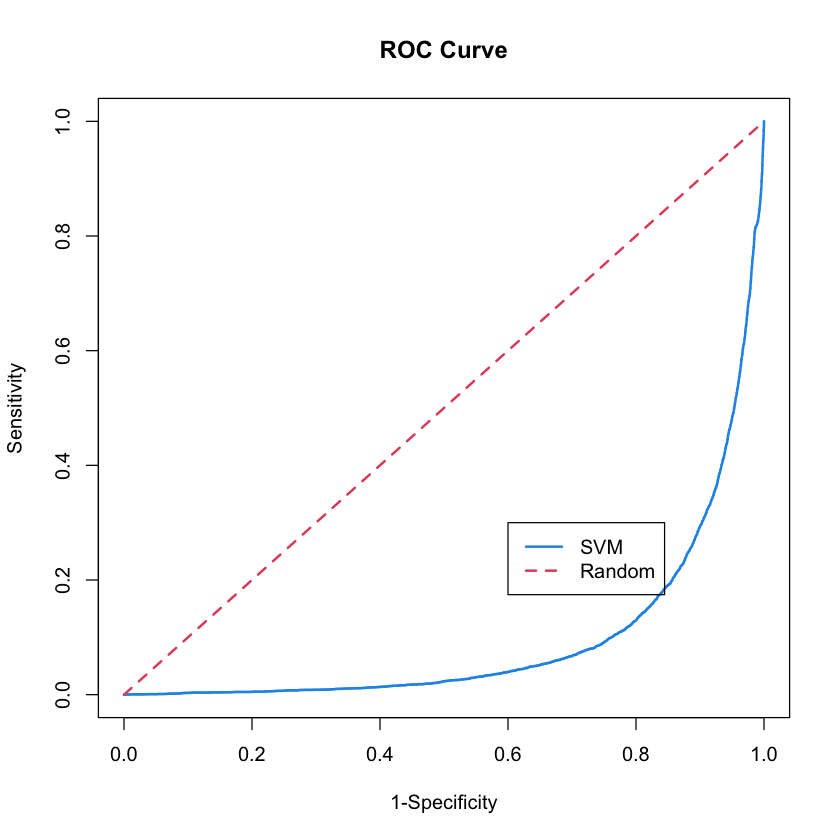

In [50]:
fit.pred = predict(fit, newdata = bank,  decision.values=TRUE)
pred = attributes(fit.pred)$decision.values
pred = prediction(pred, bank$y)

perf = performance(pred, "tpr","fpr")
plot(perf, col = 4, lwd = 2, xlab = "1-Specificity", ylab = "Sensitivity", main = "ROC Curve") #ROC
lines(x = c(0,1), y = c(0,1), col = 2, lty = 2, lwd = 2)
legend(0.6, 0.3, legend = c("SVM","Random"), col = c(4,2), lty = c(1,2), lwd = 2)

performance(pred, "auc")@y.values #AUC

> SVM (no partition)의 AUC값은 0.0946으로 매우 낮으며 ROC curve도 random prediction보다 좋지 않은 성능을 보입니다.

### 2. PARTITION

In [51]:
set.seed(123)
V = 2
n =  NROW(bank)
id = sample(1:V, n, prob = c(0.7,0.3), replace = T) # Partitioning 7:3
ii = which(id==1)
bank.train = bank[ii,]
bank.test  = bank[-ii,]

In [52]:
fit = svm(y ~., data = bank.train, kernel="linear", decision.values=TRUE)
summary(fit)


Call:
svm(formula = y ~ ., data = bank.train, kernel = "linear", decision.values = TRUE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  1 

Number of Support Vectors:  7350

 ( 3891 3459 )


Number of Classes:  2 

Levels: 
 0 1




> 데이터를 훈련과 시험 데이터셋으로 분할한 뒤에 SVM을 수행해본 결과, 클래스 0으로는 3891개, 그리고 클래스 1에는 3459개의 관측치가 분류되었습니다.

In [54]:
fit.pred = predict(fit, newdata = bank.test,  decision.values=TRUE)
pred = attributes(fit.pred)$decision.values

cutoff = 0.5
fit.yhat = ifelse(pred <= cutoff, 0, 1)
ctable = table(bank.test$y, fit.yhat,  dnn = c("Actual", "Predicted"))  
ctable

miss.err = 1-sum(diag(ctable))/sum(ctable) # Misclassification Rate
miss.err

pred.acc = 1 - miss.err #Prediction Accuracy
pred.acc  

diag(ctable)[2]/apply(ctable, 1, sum)[2] # Sensitivity
diag(ctable)[1]/apply(ctable, 1, sum)[1] # Specificity

      Predicted
Actual     0     1
     0   153 11652
     1   269  1277

[1] 0.8928919

[1] 0.1071081

1 
0.8260026

0 
0.01296061

> No partition과 동일하게 정기예금에 실제로 가입하지 않았는데 가입했다고 오분류한 수가 그렇지 않은 수에 비해서 약 40배 높은 것을 볼 수 있습니다. 민감도는 0.826이며 특이도는 0.0130으로 no partition과 비슷한 양상입니다.

[[1]]
[1] 0.09593862

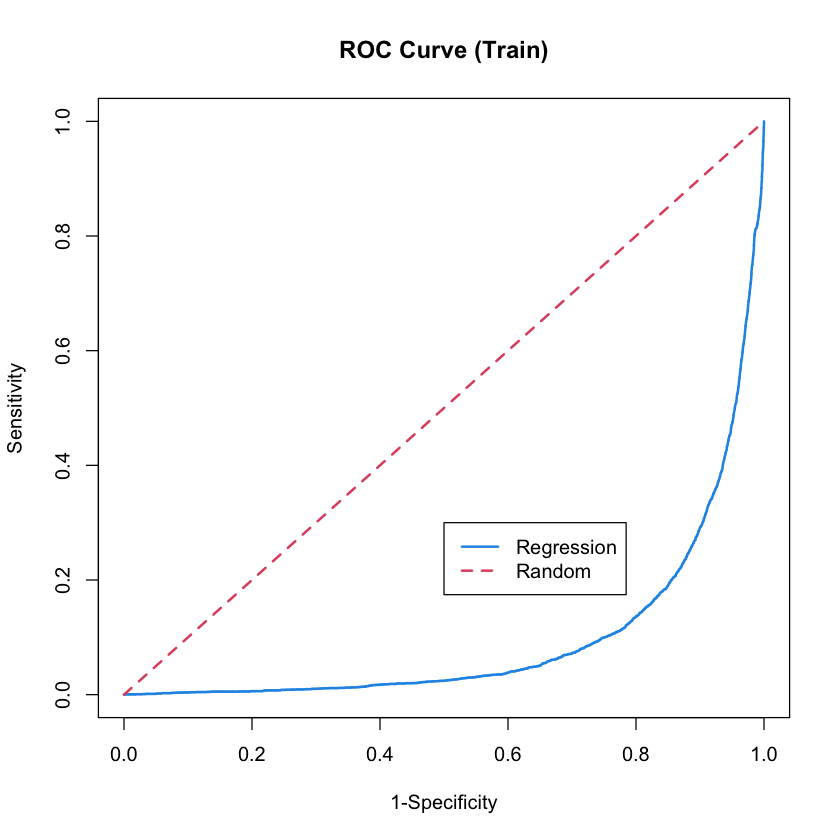

[[1]]
[1] 0.09873215

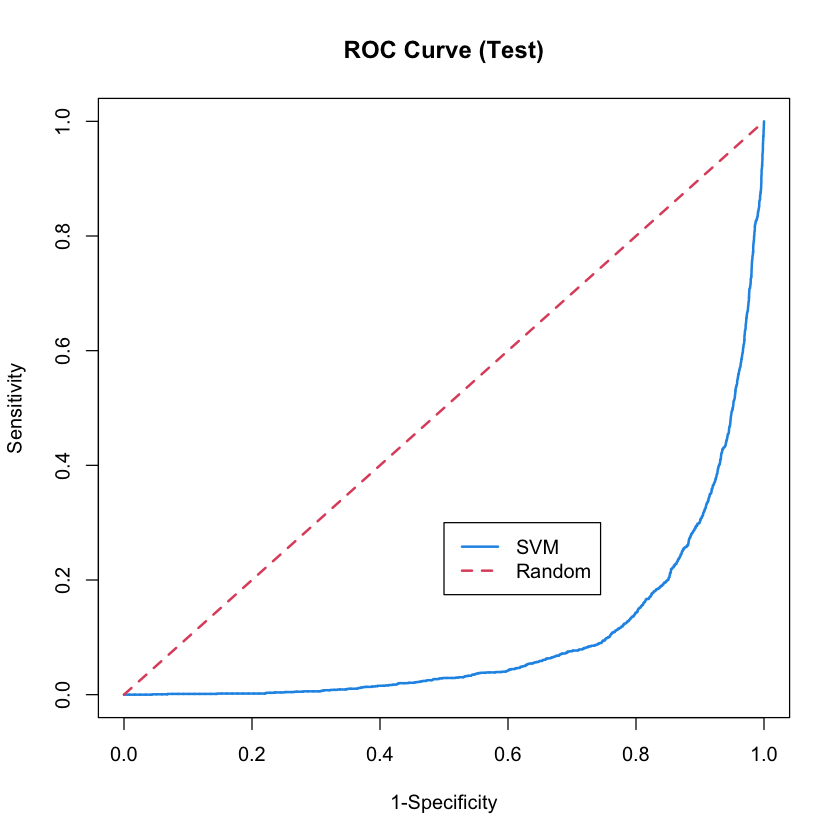

In [55]:
par(mfrow = c(1,1))

fit.pred = predict(fit, newdata = bank.train,  decision.values=TRUE)
pred = attributes(fit.pred)$decision.values
pred = prediction(pred, bank.train$y)

perf = performance(pred, "tpr","fpr")
plot(perf, col = 4, lwd = 2, xlab = "1-Specificity", ylab = "Sensitivity", main = "ROC Curve (Train)") #ROC
lines(x = c(0,1), y = c(0,1), col = 2, lty = 2, lwd = 2)
legend(0.5, 0.3, legend = c("Regression","Random"), col = c(4,2), lty = c(1,2), lwd = 2)

performance(pred, "auc")@y.values #AUC


fit.pred = predict(fit, newdata = bank.test,  decision.values=TRUE)
pred = attributes(fit.pred)$decision.values
pred = prediction(pred, bank.test$y)

perf = performance(pred, "tpr","fpr")
plot(perf, col = 4, lwd = 2, xlab = "1-Specificity", ylab = "Sensitivity", main = "ROC Curve (Test)") #ROC
lines(x = c(0,1), y = c(0,1), col = 2, lty = 2, lwd = 2)
legend(0.5, 0.3, legend = c("SVM","Random"), col = c(4,2), lty = c(1,2), lwd = 2)

performance(pred, "auc")@y.values #AUC

> Train과 test AUC 값 모두 0.09 정도로 매우 낮은 수치와 동일하게 random prediction보다 못한 성능을 보여줍니다.

### 3. CV ERROR

In [56]:
cutoff = 0.5

V = 3 #V-fold CV
miss.err.train = 0
miss.err.test = 0

set.seed(1234)
id = sample(1:V, nrow(bank), replace = T)

for(i in 1:V) {
  
  print(i)

  ## Data Partitioning 

  bank.train = bank[id != i,] 
  bank.test  = bank[id == i,] 
  
  ## Fitting

  fit = svm(y ~., data = bank.train, kernel="linear")
  
  ## Predicting and Evaluating
  
  #fit.pred = predict(fit, newdata = german.test,  decision.values=TRUE)
  #pred.test = attributes(fit.pred)$decision.values
  #yhat.test = ifelse(pred.test <= cutoff, 0, 1)
  yhat.test = predict(fit, newdata = bank.test) 
  miss.err.test = miss.err.test + mean(bank.test$y != yhat.test)
  
}

cv.err.test = miss.err.test/V; cv.err.test # CV test error

[1] 1
[1] 2
[1] 3


[1] 0.1071218

> 3-fold CV error을 산출해본 결과, error가 0.107로 낮은 것을 볼 수 있다. 이는 앞선 no partition과 partition보다 SVM에서는 cv error을 이용하는 것이 성능 개선에 도움을 준다는 것을 알 수 있습니다.

---

#### 참고 reference
- https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=tjdudwo93&logNo=221046169123
- https://dsbook.tistory.com/325